# Craft Beer Final Notebook

#### James Allen

This notebook is for exploring the craft beer data set

## Executive Summary

- a

- b

- c

## Conclusion

- a


In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
from sklearn.model_selection import train_test_split

from acquire import beer_df, beer_states, top_beers, train_validate_test_split

import warnings
warnings.filterwarnings("ignore")

# Acquire

In [2]:
# getting the beer data from my acquire file
df = beer_df()
df.head() # check_yo_head

,number,abv,ibu,beer,beer_style,ounces,brewery,city,state
0,0,0.050,43.027972,Pub Beer,American Pale Lager,12.0,NorthGate Brewing,Minneapolis,MN
1,1,0.066,43.027972,Devil's Cup,American Pale Ale (APA),12.0,Against the Grain Brewery,Louisville,KY
2,2,0.071,43.027972,Rise of the Phoenix,American IPA,12.0,Jack's Abby Craft Lagers,Framingham,MA
3,3,0.090,43.027972,Sinister,American Double / Imperial IPA,12.0,Mike Hess Brewing Company,San Diego,CA
4,4,0.075,43.027972,Sex and Candy,American IPA,12.0,Fort Point Beer Company,San Francisco,CA


In [3]:
# using a describe to look at some statistics in the beer data
df.describe()

,number,abv,ibu,ounces
count,558.000000,558.000000,558.000000,558.000000
mean,278.500000,0.060514,43.027972,13.391398
std,161.224998,0.013622,18.697909,1.964075
min,0.000000,0.032000,4.000000,8.400000
25%,139.250000,0.050000,36.000000,12.000000
50%,278.500000,0.058000,43.027972,12.000000
75%,417.750000,0.068000,43.027972,16.000000
max,557.000000,0.125000,138.000000,24.000000


# Explore

### Making Wordclouds from Beer and Beer Styles

(-0.5, 1199.5, 799.5, -0.5)

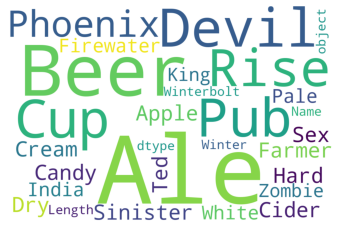

In [4]:
from wordcloud import WordCloud

beers = df.beer

img = WordCloud(background_color='white', width=1200, height=800).generate(str(beers))
plt.imshow(img)
plt.axis('off')

(-0.5, 1199.5, 799.5, -0.5)

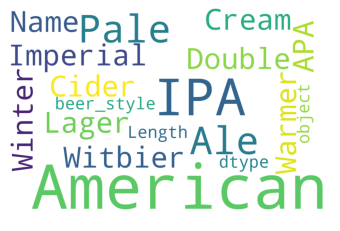

In [5]:
beers = df.beer_style

img = WordCloud(background_color='white', width=1200, height=800).generate(str(beers))
plt.imshow(img)
plt.axis('off')

### Taking a look at the top beers

In [6]:
top_beers().head()

,beer_type,total
0,American IPA,88
1,American Pale Ale (APA),54
2,American Amber / Red Ale,33
3,American Blonde Ale,25
4,American Double / Imperial IPA,24


- American IPA is by far the most popular beer type
- It looks like American Ales are all in the top 5 beer types

### Bar chart of the 10 Top Flight Beers

Text(0.5, 1.0, '10 Top Flight Beers')

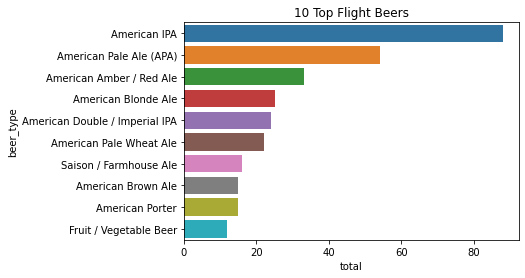

In [7]:
sns.barplot(x='total', y='beer_type', data=top_beers().head(10))
plt.title('10 Top Flight Beers')

#### Takeaways
- Visually American IPA is the most popular
- American Pale Ale (APA) is the Second most popular
- It looks like the remaining beers are close in rankings

### Pie Chart of Top 10 Beers 

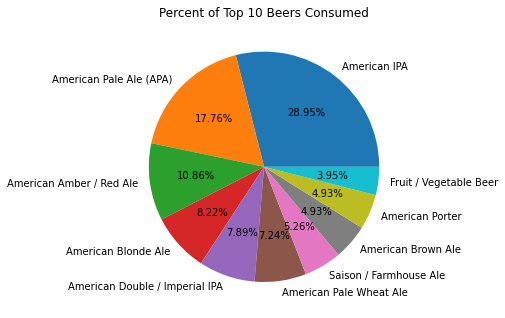

In [8]:
top10_beers = top_beers().head(10)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = top10_beers['beer_type']
totals = top10_beers['total']
ax.pie(totals, labels = labels, autopct='%1.2f%%')
plt.title('Percent of Top 10 Beers Consumed')
plt.show()

#### Takeaways
- Roughly 29% is American IPA
- Fruit / Vegetable Beer is the lowest with less than 4%

### Plotting the Alcohol by Volume

ABV Median: 0.0579999999999999


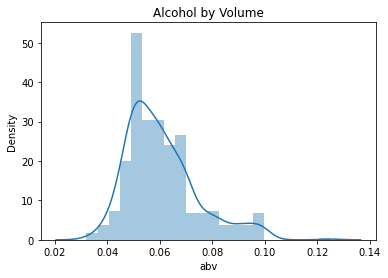

In [9]:
sns.distplot(df.abv)
plt.title('Alcohol by Volume')

print('ABV Median:', df.abv.median())

#### Takeaways
- It looks like most beers fall between 5 and 7 percent ABV
- Mean: 6%
- Median: 5.8%

### Top 10 Brewery States

In [10]:
beer_states().head(10)

,states,breweries
0,CO,47
1,CA,39
2,MI,32
3,OR,29
4,TX,28
5,PA,25
6,WA,23
7,MA,23
8,IN,22
9,WI,20


#### Takeaways
- Colorado has the most breweries: 47

### Bar Graph for Most Cities with Breweries

Text(0, 0.5, 'Number of Breweries')

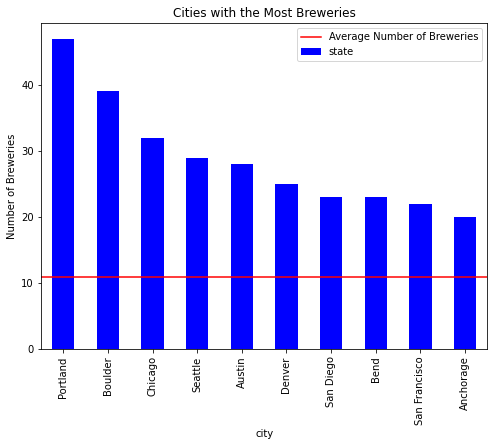

In [11]:
# plotting a bar graph for the number of breweries in each state
plot = df.state.value_counts().plot(kind='bar', title="Number of Breweries in Each State", \
                             figsize=(8,6), colormap='winter')
plot.set_xlabel('State')
plot.set_ylabel('Number of Breweries')

mean_line = plot.axhline(df.state.value_counts().mean(), color='r',\
                         label='Average Number of Breweries')
plt.legend()


#plotting a bar graph fro the cities with the most breweries
plot_c = df.groupby('city')['beer_style'].count().nlargest(10).plot(kind='bar', \
               title='Cities with the Most Breweries', \
               colormap='winter',  )
plot_c.set_ylabel('Number of Breweries')

#### Takeaways
- Portland has the most breweries but was 3rd as far as breweries by state
- Boulder is the Second most breweries by city with Colorado as the most breweries by state
- It looks like the average breweries is just over 10

In [12]:
df = df[['abv', 'ibu', 'beer_style']]

In [13]:
df.head()

,abv,ibu,beer_style
0,0.050,43.027972,American Pale Lager
1,0.066,43.027972,American Pale Ale (APA)
2,0.071,43.027972,American IPA
3,0.090,43.027972,American Double / Imperial IPA
4,0.075,43.027972,American IPA


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558 entries, 0 to 557
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   abv         558 non-null    float64
 1   ibu         558 non-null    float64
 2   beer_style  558 non-null    object 
dtypes: float64(2), object(1)
memory usage: 17.4+ KB


In [ ]:
# df.["beer_types"] = df.beer_style.tolist()

In [16]:
model_df = df.groupby('beer_style').filter(lambda x: len(x) > 10)

In [17]:
model_df.head()

,abv,ibu,beer_style
1,0.066,43.027972,American Pale Ale (APA)
2,0.071,43.027972,American IPA
3,0.090,43.027972,American Double / Imperial IPA
4,0.075,43.027972,American IPA
6,0.045,43.027972,American Pale Ale (APA)


In [18]:
df.beer_style.nunique()

77